In [1]:
# Loading package

import os
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from parameters import *

# 1. Load data

Let's load our train set and have a look in our data....uhhhh im so excited!

In [2]:
train = pd.read_csv(open_csvfile('data\\train.csv'))
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 2. Data cleaning

Let's check for some missing values - 'Age' and 'Cabine' have a lot missing values #notcool

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The feature 'ticket' is not very helpfull and doesnt add any value to our analysis. Let's drop them out for a clear dataset.

In [5]:
train = train.drop('Ticket', axis = 1)

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


The feature 'cabine' doesn't seem very helpful - however when you analyse the cabine feature, you find a new feature! *tadaaaa* the cabine contains the deck letter, which can be helpful in our analysis.
So, let us split the letter from the room number and keep only the deck

In [7]:
# split Cabine into 'Deck' and 'Room'
train['Deck'] = train.Cabin.str[:1]
del train['Cabin']

train.Deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [8]:
#incorrect data - Deck T doesn't exist - exclude value from dataset
train = train.loc[(train['Deck']) != 'T']

We've still a lot of missing values in our dataset ('Deck') - maybe we can preditct the feature 'deck' with the other features? Use Mean, Median or Mode? 'Age' has missing values as well. However, maybe we can clean this with Mean, Median or Mode. We will simulate this later...

In [9]:
train = train.dropna(subset = ['Embarked'])

In [10]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
Deck           687
dtype: int64

Now, after cleaning the dataset, we decode some features - for a better understanding (for those who read this and for myself *smile*)

In [11]:
# Define dictionary for the location of embark
dict1 = {
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}

train.Embarked = train.Embarked.map(dict1)

train.Survived.replace({0: 'No', 1: 'Yes'}, inplace = True)
train.Sex.replace({'male': 'Male', 'female': 'Female'}, inplace = True)

So, let's take a look to names...they have a title inside! Maybe we have so dependencies between surviving and title? Let's extract them!

In [12]:
# Just have a look how we should extract them...
print(train['Name'].head(5))

# Comma and dot can help us to split the elements of the name
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Now, summarised...
train['Title'].value_counts()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


Mr              516
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [13]:
# PassangerId isn't very helpfull for our analysis, so we scrup them away (just like the name)
train.drop(['PassengerId'], axis = 1, inplace = True)
train.drop(['Name'], axis = 1, inplace = True)

# 3. Data Analysis

In [14]:
print('The shape is:',train.shape)
print('')
print(train.info())
print('')
print(train.describe())
print('')
print('Let us go trough our features/labels: ')
print(train.columns)

The shape is: (888, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    object 
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       711 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    object 
 8   Deck      201 non-null    object 
 9   Title     888 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.3+ KB
None

           Pclass         Age       SibSp       Parch        Fare
count  888.000000  711.000000  888.000000  888.000000  888.000000
mean     2.313063   29.620492    0.524775    0.382883   32.092848
std      0.834007   14.491662    1.104186    0.807113   49.725379
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%

## 3.1 Survived

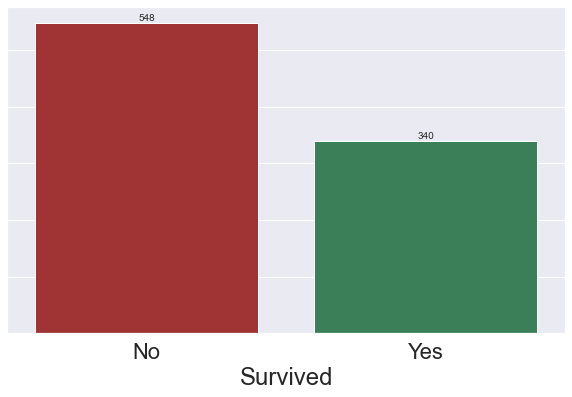

No     0.617117
Yes    0.382883
Name: Survived, dtype: float64


In [15]:
# Visualize 'Survived' with a countplot
sns.set_theme(style = 'dark')
sns.set(font_scale = 2)
ax = plt.subplots(figsize= [10, 6])

ax = sns.countplot(x='Survived', data = train, palette = {"Yes": 'seagreen', "No": "firebrick"})
ax.bar_label(ax.containers[0])
ax.set(ylabel = None, yticklabels = [])


plt.show()

# Print proportions
print(train['Survived'].value_counts(normalize = True))

## 3.2 Pclass

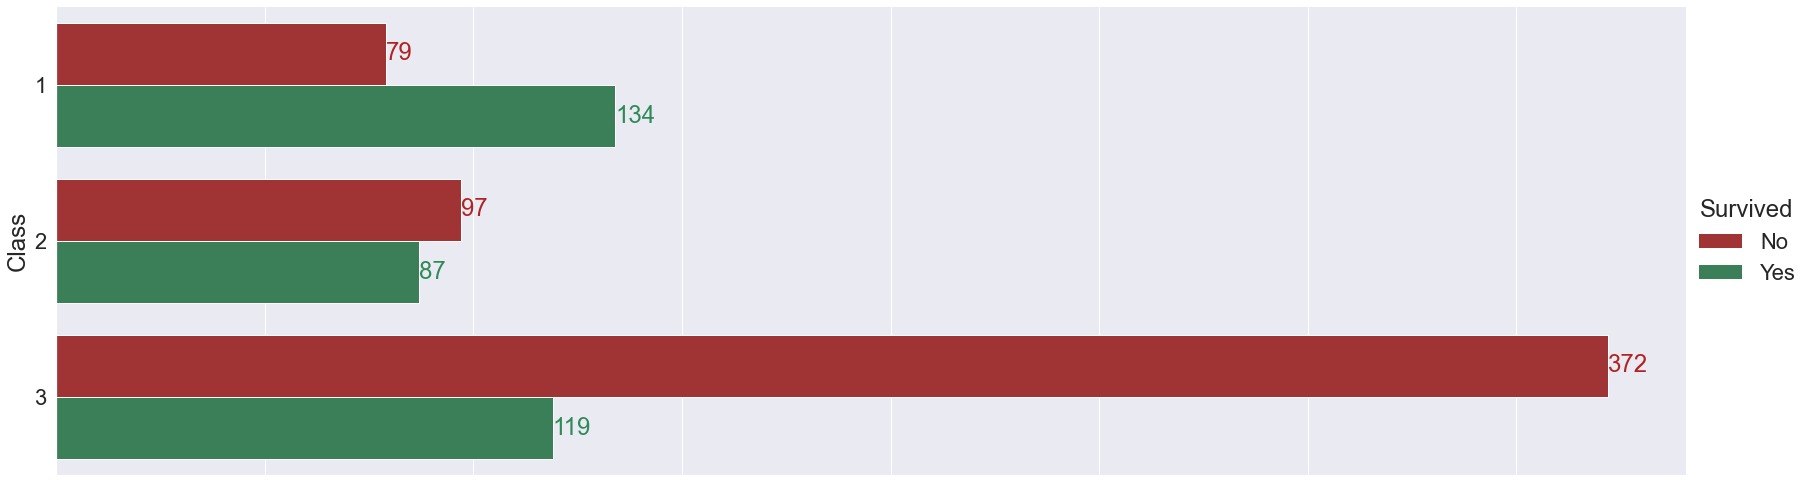

Pclass  Survived
1       Yes         0.629108
        No          0.370892
2       No          0.527174
        Yes         0.472826
3       No          0.757637
        Yes         0.242363
Name: Survived, dtype: float64

In [16]:
# Visalize with a catplot
sns.set_theme(style = 'dark')
sns.set(font_scale = 2)

ax = sns.catplot(data = train, y = 'Pclass',kind = 'count', hue = 'Survived', height = 8, aspect = 3, palette = {"Yes": 'seagreen', "No": "firebrick"})
ax.set(ylabel = 'Class')
ax.set(xlabel = None)
ax.set(xticklabels=[])
for ax in ax.axes.flat:
    ax.bar_label(ax.containers[0], color = 'firebrick')
    ax.bar_label(ax.containers[1], color = 'seagreen')

plt.show()

# Surviving rate of each class
train['Survived'].groupby(train['Pclass']).value_counts(normalize = True)

As you can see... the first class had the best surviving rate... just in case you book a boat trip soon.

## 3.3 Age

Remeber we have missing values in this feature!

In [17]:
print('Number of missing values:')
print(train["Age"].isnull().sum())

Number of missing values:
177


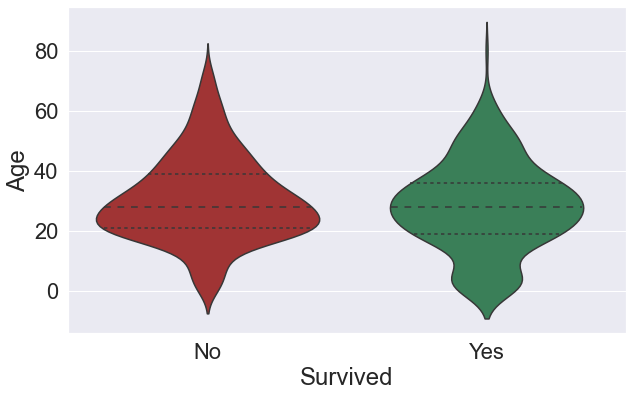

In [18]:
# However, let's have a look into distribution
sns.set_theme(style = 'dark')
sns.set(font_scale = 2)
ax = plt.subplots(figsize= [10, 6])

# Survived by age
ax = sns.violinplot(data = train, y = 'Age', x = 'Survived', inner = 'quart', palette = {"Yes": 'seagreen', "No": "firebrick"})
 #             split = True, inner = 'quart', linewidth = 1, palette = {"Male": '#14AAF5', "Female": "#E05194"})

# 3.4 Sex

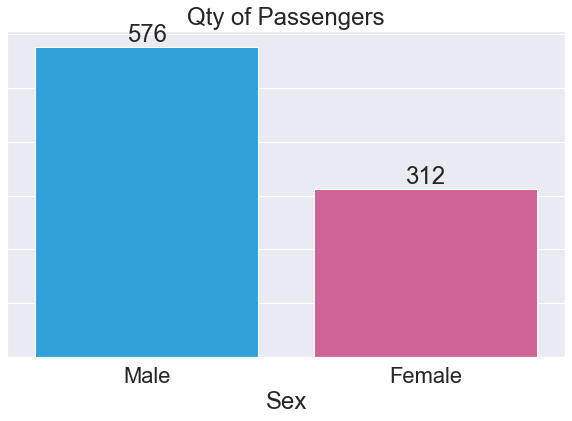

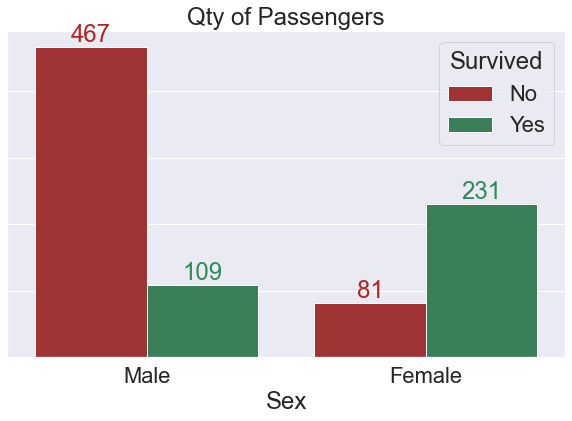

Sex     Survived
Female  Yes         0.740385
        No          0.259615
Male    No          0.810764
        Yes         0.189236
Name: Survived, dtype: float64

In [19]:
# Visualize quantity male/female
sns.set_theme(style = 'dark')
sns.set(font_scale = 2)
ax = plt.subplots(figsize= [10, 6])

ax = sns.countplot(data= train, x = 'Sex', palette = ["#14AAF5", "#E05194"])
ax.bar_label(ax.containers[0])
plt.title('Qty of Passengers')
ax.set(ylabel = None)
ax.axes.yaxis.set_ticklabels([])

# Visualize with coutplot
ax = plt.subplots(figsize= [10, 6])
ax = sns.countplot(data= train, x = 'Sex', hue = 'Survived', palette = {"Yes": 'seagreen', "No": "firebrick"})
ax.bar_label(ax.containers[0], color = 'firebrick')
ax.bar_label(ax.containers[1], color = 'seagreen')
plt.title('Qty of Passengers')
ax.set(ylabel = None)
ax.axes.yaxis.set_ticklabels([])

plt.show()

# Surviving rate by sex
train['Survived'].groupby(train['Sex']).value_counts(normalize = True)

Oh... there's a relationship between sex and surviving. Not really suprising... we all have seen the movie Titanic....."Jaaaaaaaack....."

# 3.5 Sibling / Spouse - Parent / Children

In [20]:
print(train['Parch'].head(10))
print(train['SibSp'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64
0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: SibSp, dtype: int64


'SibSp' = Sibling or Spouse number
'Parch' = Parent or Children number

Maybe if you have a bigger family, your surviving rate would increase? Let's check this relationship

In [21]:
print('Count Values of Sibling or Spouse:')
print(train["SibSp"].value_counts())

print('')
print('Count Values of Parent or Children:')
print(train["Parch"].value_counts())

train["family_size"] = train["SibSp"] + train["Parch"]

print('')
print('Count Values of Family Size:')
print(train["family_size"].value_counts())

# Proportion of people survived/not survived for each class
print(train['Survived'].groupby(train["family_size"]).value_counts(normalize = True))

Count Values of Sibling or Spouse:
0    605
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Count Values of Parent or Children:
0    675
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Count Values of Family Size:
0     534
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64
family_size  Survived
0            No          0.698502
             Yes         0.301498
1            Yes         0.552795
             No          0.447205
2            Yes         0.578431
             No          0.421569
3            Yes         0.724138
             No          0.275862
4            No          0.800000
             Yes         0.200000
5            No          0.863636
             Yes         0.136364
6            No          0.666667
             Yes         0.333333
7            No          1.000000
10           No          1.000000
Name: Survived, dtype: float64


The family size is important when you wanted to survive on the titanc. Let's organize them to groups during the data cleaning process

## 3.6 Fare

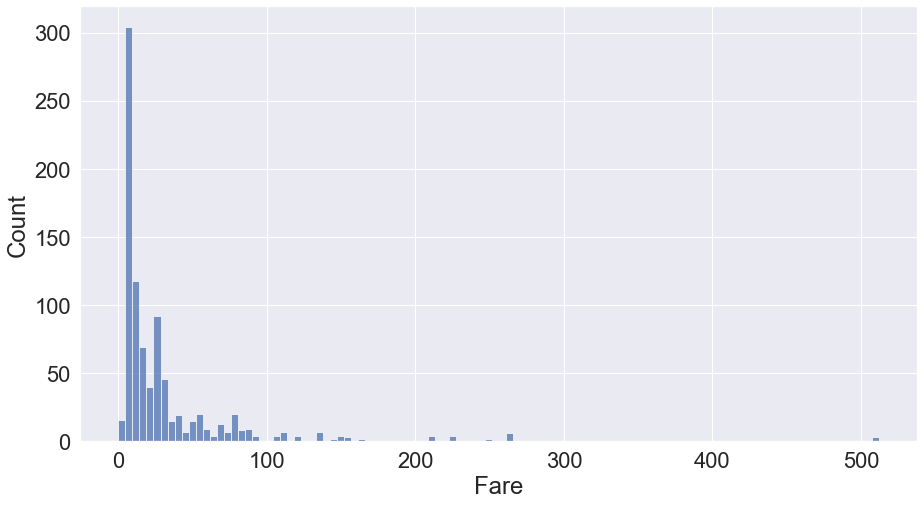

(-0.512, 170.776]     868
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: Fare, dtype: int64

Fare                Survived
(-0.512, 170.776]   No          0.624424
                    Yes         0.375576
(170.776, 341.553]  Yes         0.647059
                    No          0.352941
(341.553, 512.329]  Yes         1.000000
Name: Survived, dtype: float64


In [22]:
# Plot the histogram
sns.set_theme(style = 'dark')
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

sns.histplot(train["Fare"])
plt.show()

# Print 3 bins (for each Pclass)
print(pd.cut(train['Fare'], 3).value_counts())
print('')

# Print (binned) fare by surviving rate
print(train['Survived'].groupby(pd.cut(train['Fare'], 3)).value_counts(normalize = True))

## 3.7 Deck

Ufff... the feature deck has many NaN Values

In [23]:
print('Feature value have', train['Deck'].isnull().sum(), 'NaN values.')
print('')
print(train["Deck"].value_counts(dropna = False))

Feature value have 687 NaN values.

NaN    687
C       59
B       45
D       33
E       32
A       15
F       13
G        4
Name: Deck, dtype: int64


In [24]:
# Surviving rate by Deck
print(train.groupby("Deck", dropna = False)["Survived"].value_counts(normalize = True))

x = train.groupby("Deck", dropna = False)["Survived"].value_counts(normalize = True).to_frame()
x.rename(columns = {'Survived': 'Rate'}, inplace = True)
x.reset_index(inplace = True)
x.loc[x['Survived'] == 'Yes'].sort_values(['Rate'], ascending = False)

Deck  Survived
A     No          0.533333
      Yes         0.466667
B     Yes         0.733333
      No          0.266667
C     Yes         0.593220
      No          0.406780
D     Yes         0.757576
      No          0.242424
E     Yes         0.750000
      No          0.250000
F     Yes         0.615385
      No          0.384615
G     No          0.500000
      Yes         0.500000
NaN   No          0.700146
      Yes         0.299854
Name: Survived, dtype: float64


,Deck,Survived,Rate
6,D,Yes,0.757576
8,E,Yes,0.750000
2,B,Yes,0.733333
10,F,Yes,0.615385
4,C,Yes,0.593220
13,G,Yes,0.500000
1,A,Yes,0.466667
15,NaN,Yes,0.299854


## 3.8 Embarked

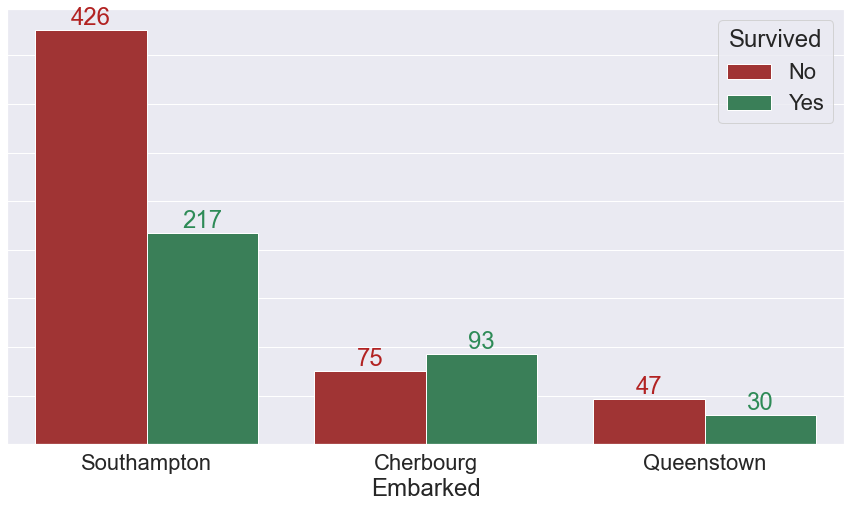

Southampton    643
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

Embarked     Survived
Cherbourg    Yes         0.553571
             No          0.446429
Queenstown   No          0.610390
             Yes         0.389610
Southampton  No          0.662519
             Yes         0.337481
Name: Survived, dtype: float64


In [25]:
# Make a countplot
sns.set_theme(style = 'dark')
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.countplot(x="Embarked", hue="Survived", data=train, palette = {'Yes' : 'seagreen', 'No' : 'firebrick'})
ax.bar_label(ax.containers[0], color = 'firebrick')
ax.bar_label(ax.containers[1], color = 'seagreen')
ax.set(ylabel = None, yticklabels = [])
plt.show()

# Print the value counts
print(train["Embarked"].value_counts())
print('')

#Surviving rate of embarked
print(train["Survived"].groupby(train["Embarked"]).value_counts(normalize = True))

For now, we had a dive into our dataset. We explorate some information which is important for our next chapter.... Data wrangling...